Lo siguiente está basado en el capítulo 8 del libro de Álgebra Lineal de S. Grossman y J. Flores y el libro de Matrix Analysis and Applied Linear Algebra de C. D. Meyer.

# Definiciones generales

En lo que sigue se supone una matriz cuadrada $A \in \mathbb{R}^{nxn}$.

## Eigenvalor (valor propio o característico)

El número $\lambda$ (real o complejo) se denomina *eigenvalor* de A si existe $v \in \mathbb{C}^n - \{0\}$ tal que $Av = \lambda v$. El vector $v$ se nombra eigenvector (vector propio o característico) de $A$ correspondiente al eigenvalor $\lambda$.

**Obs:** 

* Una matriz con componentes reales puede tener eigenvalores y eigenvectores con valores en $\mathbb{C}$ o $\mathbb{C}^n$ respectivamente.
* El conjunto de eigenvalores se le llama **espectro de una matriz**.
* $A$ siempre tiene al menos un eigenvalor con eigenvector asociado.

**Nota:** Si A es simétrica entonces tiene eigenvalores reales y aún más: $A$ tiene eigenvectores reales linealmente independientes y forman un conjunto ortonormal. Entonces $A$ se escribe como un producto de tres matrices nombrado descomposición espectral: $$A = Q \Lambda Q^T$$ donde: $Q$ es una matriz ortogonal cuyas columnas son eigenvectores de $A$ y $\Lambda$ es una matriz diagonal con eigenvalores de $A$.

### En numpy...

**En numpy con el módulo `eig` podemos obtener eigenvalores y eigenvectores** 

In [1]:
import numpy as np
import pprint

### Ejemplo

In [2]:
A=np.array([[10,-18],[6,-11]])
pprint.pprint(A)

array([[ 10, -18],
       [  6, -11]])


In [4]:
evalor, evector = np.linalg.eig(A)

In [5]:
print('eigenvalores:')
pprint.pprint(evalor)
print('eigenvectores:')
pprint.pprint(evector)

eigenvalores:
array([ 1., -2.])
eigenvectores:
array([[0.89442719, 0.83205029],
       [0.4472136 , 0.5547002 ]])


Comprobamos: $Av_1 = \lambda v_1$, $Av_2 = \lambda v_2$.

In [12]:
print('matriz * eigenvector:')
pprint.pprint(A@evector[:,0])
print('eigenvalor * eigenvector:')
pprint.pprint(evalor[0]*evector[:,0])

matriz * eigenvector:
array([0.89442719, 0.4472136 ])
eigenvalor * eigenvector:
array([0.89442719, 0.4472136 ])


In [13]:
print('matriz * eigenvector:')
pprint.pprint(A@evector[:,1])
print('eigenvalor * eigenvector:')
pprint.pprint(evalor[1]*evector[:,1])

matriz * eigenvector:
array([-1.66410059, -1.10940039])
eigenvalor * eigenvector:
array([-1.66410059, -1.10940039])


**Obs:** si $v$ es un eigenvector entonces $cv$ es eigenvector donde: $c$ es una constante distinta de cero:

In [16]:
constante = -2
constante_evector = constante*evector[:,0]
pprint.pprint(constante_evector)

array([-1.78885438, -0.89442719])


In [18]:
print('matriz * (constante * eigenvector):')
pprint.pprint(A@constante_evector)
print('eigenvalor * (constante * eigenvector):')
pprint.pprint(evalor[0]*constante_evector)

matriz * (constante * eigenvector):
array([-1.78885438, -0.89442719])
eigenvalor * (constante * eigenvector):
array([-1.78885438, -0.89442719])


### Ejemplo 2

Una matriz con entradas reales puede tener eigenvalores y eigenvectores complejos:

In [19]:
A=np.array([[3,-5],[1,-1]])
pprint.pprint(A)

array([[ 3, -5],
       [ 1, -1]])


In [20]:
evalor, evector = np.linalg.eig(A)

In [21]:
print('eigenvalores:')
pprint.pprint(evalor)
print('eigenvectores:')
pprint.pprint(evector)

eigenvalores:
array([1.+1.j, 1.-1.j])
eigenvectores:
array([[0.91287093+0.j        , 0.91287093-0.j        ],
       [0.36514837-0.18257419j, 0.36514837+0.18257419j]])


### Ejemplo 3

Matriz simétrica y descomposición espectral de la misma:

In [22]:
A=np.array([[5,4,2],[4,5,2],[2,2,2]])
pprint.pprint(A)

array([[5, 4, 2],
       [4, 5, 2],
       [2, 2, 2]])


In [23]:
evalor, evector = np.linalg.eigh(A)

In [24]:
print('eigenvalores:')
pprint.pprint(evalor)
print('eigenvectores:')
pprint.pprint(evector)

eigenvalores:
array([ 1.,  1., 10.])
eigenvectores:
array([[ 0.4817794 ,  0.56872152,  0.66666667],
       [-0.72665643, -0.16590957,  0.66666667],
       [ 0.48975406, -0.80562389,  0.33333333]])


In [27]:
print('descomposición espectral:')
Lambda = np.diag(evalor)
Q = evector
print('QAQ^T:')
pprint.pprint(Q@Lambda@Q.T)
print('A:')
pprint.pprint(A)

descomposición espectral:
QAQ^T:
array([[5., 4., 2.],
       [4., 5., 2.],
       [2., 2., 2.]])
A:
array([[5, 4, 2],
       [4, 5, 2],
       [2, 2, 2]])


ver [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) y [numpy.linalg.eigh](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigh.html)

# Valores y vectores singulares de una matriz

En lo que sigue se supone $A \in \mathbb{R}^{mxn}$.

## Valor singular

El número $\sigma$ se denomina valor *singular* de $A$ si $\sigma = \sqrt{\lambda_{A^TA}} = \sqrt{\lambda_{AA^T}}$ donde: $\lambda_{A^TA}$ y $\lambda_{AA^T}$ es eigenvalor de $A^TA$ y $AA^T$ respectivamente .

**Obs:** la definición se realiza sobre $A^TA$ o $AA^T$ pues éstas matrices tienen el mismo espectro y además sus eigenvalores son reales y positivos por lo que $\sigma \in \mathbb{R}$ y de hecho $\sigma \geq 0$ (la raíz cuadrada se calcula para un eigenvalor no negativo).

## Vector singular izquierdo, vector singular derecho

Asociado con cada valor singular $\sigma$ existen vectores singulares $u,v$ que cumplen con la igualdad: $$Av = \sigma u .$$ Al vector $u$ se le nombra vector singular *izquierdo* y al vector $v$ se le nombra vector singular *derecho*.

## Descomposición en valores singulares (SVD)

Si $A \in \mathbb{R}^{mxn}$ entonces existen $U \in \mathbb{R}^{mxm}, V \in \mathbb{R}^{nxn}$ ortogonales tales que: $A = U\Sigma V^T$ con $\Sigma = diag(\sigma_1, \sigma_2, \dots, \sigma_p) \in \mathbb{R}^{mxn}$, $p = \min\{m,n\}$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_p \geq 0$.

**Obs:** La notación $\sigma_1$ hace referencia al valor singular más grande de A, $\sigma_2$ al segundo valor singular más grande de A y así sucesivamente.

**Obs2:** La SVD que se definió arriba es nombrada *SVD full*, hay una forma **truncada** en la que $U \in \mathbb{R}^{mxk}$, $V \in \mathbb{R}^{nxk}$ y $\Sigma \in \mathbb{R}^{kxk}$.

Existen diferentes propiedades de los valores y vectores singulares, aquí se enlistan algunas:

* Si $rank(A) = r$ entonces $r \leq p$ y $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > \sigma_{r+1} = \sigma_{r+2} = \dots = \sigma_p =  0$.

* Si $rank(A) = r$ entonces $A = \displaystyle \sum_{i=0}^r \sigma_i u_i v_i^T$ con $u_i$ $i$-ésima columna de U y $v_i$ $i$-ésima columna de V.

* Geométricamente los valores singulares de una matriz $A \in \mathbb{R}^{mxn}$ son las longitudes de los semiejes del hiperelipsoide $E$ definido por $E = \{Ax : ||x|| \leq 1, \text{ con } ||\cdot || \text{ norma Euclidiana}\}$ y los vectores $u_i$ son direcciones de estos semiejes; los vectores $vi$'s tienen norma igual a $1$ por lo que se encuentran en una circunferencia de radio igual a $1$ y como $Av_i = \sigma u_i$ entonces $A$ mapea los vectores $v_i$'s a los semiejes $u_i$'s respectivamente:


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=0B66Kmqpqr3IQbnJYUW9XR3BhM1h1eFctMUdIbTNfa2RScFVv" alt="a" heigth=700" width="700">
</p>

* La SVD da bases ortogonales para los $4$ espacios fundamentales de una matriz: espacio columna, espacio nulo izquierdo, espacio nulo y espacio renglón:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=0B66Kmqpqr3IQVXVndGtLY3dVQy1XdEFSbi1POEoyVnFjRUY4" alt="b" heigth="700" width="700">
</p>

* Si $t < r$ y $r=rank(A)$ entonces $A_t =  \displaystyle \sum_{i=0}^t \sigma_i u_i v_i^T$ es una matriz de entre todas las matrices con $rank$ igual a t, que es más *cercana* a A (la cercanía se mide con una norma **matricial**).

Entre las aplicaciones de la SVD se encuentran:

* Procesamiento de imágenes y señales.
* Sistemas de recomendación (Netflix).
* Mínimos cuadrados.
* Componentes principales.
* Reconstrucción de imágenes.

## En numpy ...

**En numpy con el módulo linalg podemos calcular la SVD de A, obsérvese en la ayuda [numpy.linalg.svd](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) que se regresa $V^T$ y no $V$:**

### Ejemplo 1

In [1]:
import numpy as np
import pprint

In [2]:
A = np.array([[1,-1],[1,-2],[1,-1]])
print('A:')
pprint.pprint(A)

A:
array([[ 1, -1],
       [ 1, -2],
       [ 1, -1]])


In [3]:
U,S,V_T = np.linalg.svd(A) #se regresa V^T no V

In [4]:
print('U:')
pprint.pprint(U)
print('Sigma:')
pprint.pprint(S)
print('V^T:')
pprint.pprint(V_T)

U:
array([[-0.46982945,  0.52845084, -0.70710678],
       [-0.74734234, -0.66443918,  0.        ],
       [-0.46982945,  0.52845084,  0.70710678]])
Sigma:
array([2.96175655, 0.47749149])
V^T:
array([[-0.56959484,  0.82192562],
       [ 0.82192562,  0.56959484]])


In [5]:
print('dimensiones de U:', U.shape)
print('dimensiones de S:', S.shape)
print('dimensiones de V:', V_T.T.shape)

dimensiones de U: (3, 3)
dimensiones de S: (2,)
dimensiones de V: (2, 2)


In [6]:
#comprobación:
r, =S.shape
print('U*S*V^T:')
pprint.pprint(U[:,:r]*S@V_T)
print('A:')
pprint.pprint(A)

U*S*V^T:
array([[ 1., -1.],
       [ 1., -2.],
       [ 1., -1.]])
A:
array([[ 1, -1],
       [ 1, -2],
       [ 1, -1]])


### Ejemplo 2

SVD truncada:

In [7]:
A = np.array([[1,1,-2],[1,-1,1]])
print('A:')
pprint.pprint(A)

A:
array([[ 1,  1, -2],
       [ 1, -1,  1]])


In [8]:
U,S,V_T = np.linalg.svd(A,full_matrices=False) #queremos una versión truncada 
                                               #con truncamiento igual al rank de A

In [9]:
print('U:')
pprint.pprint(U)
print('Sigma:')
pprint.pprint(S)
print('V^T:') #se regresa V^T no V
pprint.pprint(V_T)

U:
array([[-0.89442719,  0.4472136 ],
       [ 0.4472136 ,  0.89442719]])
Sigma:
array([2.64575131, 1.41421356])
V^T:
array([[-1.69030851e-01, -5.07092553e-01,  8.45154255e-01],
       [ 9.48683298e-01, -3.16227766e-01, -2.49800181e-16]])


In [10]:
print('dimensiones de U:', U.shape)
print('dimensiones de S:', S.shape)
print('dimensiones de V:', V_T.T.shape)

dimensiones de U: (2, 2)
dimensiones de S: (2,)
dimensiones de V: (3, 2)


In [11]:
#comprobación:
r, =S.shape
print('U*S*V^T:')
pprint.pprint((U*S)@V_T)
print('A:')
pprint.pprint(A)

U*S*V^T:
array([[ 1.,  1., -2.],
       [ 1., -1.,  1.]])
A:
array([[ 1,  1, -2],
       [ 1, -1,  1]])


ver: [numpy.linalg.svd](numpy.linalg.svd)

# Aplicación: reconstrucción de imágenes

Dentro de las aplicaciones de la SVD de una matriz se encuentra la de reconstrucción de imágenes.

## En numpy y matplotlib ...

Tomar en cuenta: *matplotlib only supports PNG images* de acuerdo a [liga](https://matplotlib.org/users/image_tutorial.html) pero se puede instalar el paquete de [Pillow](https://pypi.org/project/Pillow/) con pip para soportar otros formatos (si usan el contenedor de docker ejecutar en la terminal: `workon propedeutico` y después `pip install pillow`)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
img=plt.imread('Kiara.png')

ver: [matplotlib.pyplot.imread](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imread.html)

In [14]:
img #Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0

array([[[0.76862746, 0.5294118 , 0.3137255 , 1.        ],
        [0.77254903, 0.53333336, 0.3137255 , 1.        ],
        [0.7764706 , 0.5372549 , 0.31764707, 1.        ],
        ...,
        [0.8509804 , 0.6313726 , 0.39607844, 1.        ],
        [0.84705883, 0.627451  , 0.39215687, 1.        ],
        [0.84313726, 0.62352943, 0.3882353 , 1.        ]],

       [[0.76862746, 0.5294118 , 0.31764707, 1.        ],
        [0.77254903, 0.53333336, 0.31764707, 1.        ],
        [0.7764706 , 0.5372549 , 0.31764707, 1.        ],
        ...,
        [0.85882354, 0.6392157 , 0.4       , 1.        ],
        [0.8509804 , 0.6313726 , 0.39215687, 1.        ],
        [0.84705883, 0.627451  , 0.3882353 , 1.        ]],

       [[0.77254903, 0.53333336, 0.32156864, 1.        ],
        [0.77254903, 0.53333336, 0.32156864, 1.        ],
        [0.77254903, 0.53333336, 0.31764707, 1.        ],
        ...,
        [0.8627451 , 0.6431373 , 0.40392157, 1.        ],
        [0.85490197, 0.635294

Los datos tienen cuatro canales:

In [15]:
img.shape

(449, 720, 4)

Sólo usaremos uno de ellos

In [16]:
img[:,:,0].shape

(449, 720)

In [17]:
img = img[:,:,0]

Text(0.5, 1.0, 'Imagen en escala de grises')

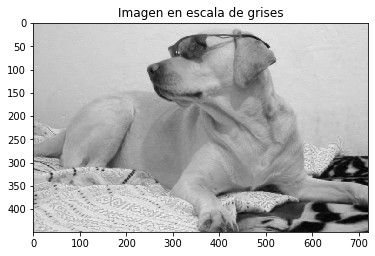

In [18]:
imgplot = plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')

### Aplicamos SVD a la imagen

In [19]:
U,S,V_T = np.linalg.svd(img, full_matrices=False)

In [20]:
print(U.shape)
print(S.shape)
print(V_T.shape)

(449, 449)
(449,)
(449, 720)


In [21]:
img_svd = (U*S)@V_T

In [22]:
img_svd.shape

(449, 720)

Text(0.5, 1.0, 'Imagen utilizando SVD')

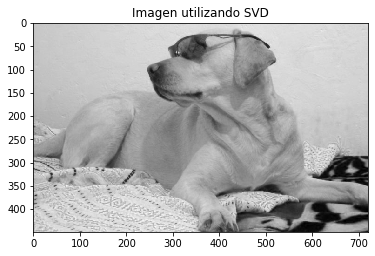

In [23]:
plt.imshow(img_svd, cmap='gray')
plt.title('Imagen utilizando SVD')

### Sólo usando 1 vector singular izquierdo, derecho y 1 valor singular

In [24]:
(U[:,1]*S[1]).shape

(449,)

In [25]:
img_svd_1=np.outer((U[:,1]*S[1]),V_T[1,:])

In [26]:
img_svd_1.shape

(449, 720)

Text(0.5, 1.0, 'SVD truncada a 1')

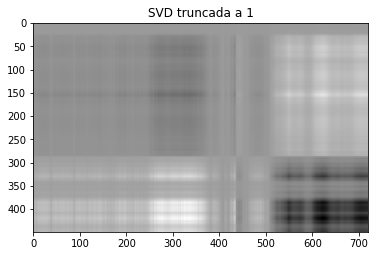

In [27]:
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')

### Usando 2 vectores singulares izquierdos, derechos y 2 valores singulares

In [28]:
img_svd_2=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:])

Text(0.5, 1.0, 'SVD truncada a 2')

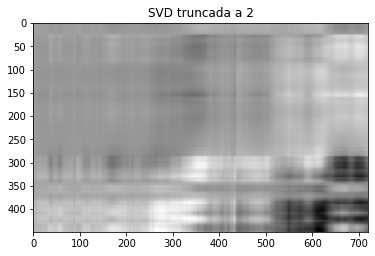

In [29]:
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')

### Usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares

**Ejercicio: resolver este caso**